In [1]:
%load_ext autoreload
%autoreload 2

from src import __root__
%cd $__root__

/home/xlluo/hdd/ML-fracture


In [2]:
# %cd ..

# Random Split

In [2]:
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.load_data()
trainer.train(verbose=True)

models = [
    MLP(trainer),
    ThisWork(trainer),
    ThisWork(trainer, manual_activate=["linlogSN"], program="ThisWorklinlog"),
    ThisWork(trainer, manual_activate=["loglogSN"], program="ThisWorkloglog"),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

Using cpu device
{
	'project': 'SNL_MSU_DOE_fatigue',
	'loss': 'mse',
	'bayes_opt': False,
	'bayes_epoch': 3,
	'patience': 50,
	'epoch': 200,
	'lr': 0.003,
	'weight_decay': 0.002,
	'batch_size': 1024,
	'static_params': {
		'patience': 50,
		'epoch': 200
	},
	'chosen_params': {
		'lr': 0.003,
		'weight_decay': 0.002,
		'batch_size': 1024
	},
	'layers': [
		16,
		64,
		128,
		128,
		64,
		16
	],
	'n_calls': 100,
	'SPACEs': {
		'lr': {
			'type': 'Real',
			'low': 0.001,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'weight_decay': {
			'type': 'Real',
			'low': 1e-05,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'batch_size': {
			'type': 'Categorical',
			'categories': [
				32,
				64,
				128,
				256,
				512,
				1024,
				2048,
				4096
			]
		}
	},
	'data_splitter': 'RandomSplitter',
	'data_processors': [
		'IQRRemover',
		'MeanImputer',
		'SingleValueFeatureRemover',
		'UnscaledDataRecorder',
		'StandardScaler'
	],
	'data_derivers': {
		'MinStressDeriver': {
			'derived_

### S-N curve

Bootstrap CI 95.0\%
Training 6/27
Validation 1/10
Testing 0/4
Lin-log CI 95.0\%
Training 26/27
Validation 10/10
Testing 4/4
Log-log CI 95.0\%
Training 27/27
Validation 10/10
Testing 4/4


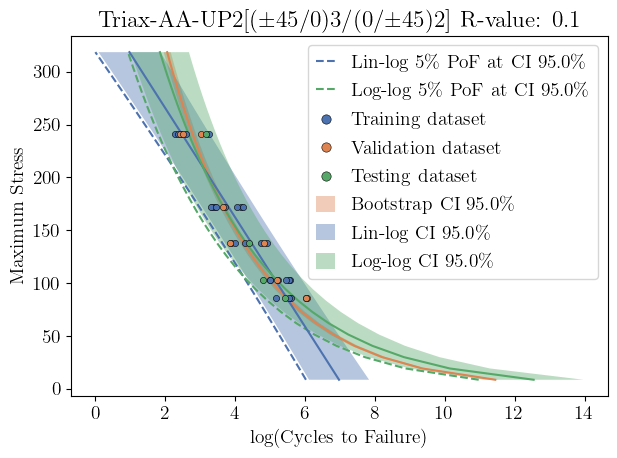

In [44]:
trainer.plot_S_N(m_code='Triax-AA-UP2[(±45/0)3/(0/±45)2]', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog")

In [4]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False)
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP")

In bootstrap CI:
Training 8/27
Validation 3/10
Testing 1/4
In statistical CI:
Training 10/27
Validation 4/10
Testing 1/4
In bootstrap CI:
Training 12/34
Validation 3/17
Testing 4/10
In statistical CI:
Training 10/34
Validation 5/17
Testing 2/10
In bootstrap CI:
Training 5/21
Validation 4/11
Testing 5/9
In statistical CI:
Training 6/21
Validation 6/11
Testing 6/9
In bootstrap CI:
Training 5/15
Validation 3/6
Testing 4/6
In statistical CI:
Training 9/15
Validation 4/6
Testing 4/6
In bootstrap CI:
Training 19/21
Validation 5/7
Testing 6/7
In statistical CI:
Training 11/21
Validation 2/7
Testing 2/7
In bootstrap CI:
Training 17/17
Validation 7/7
Testing 9/9
In statistical CI:
Training 10/17
Validation 4/7
Testing 3/9
In bootstrap CI:
Training 4/19
Validation 2/5
Testing 3/9
In statistical CI:
Training 6/19
Validation 3/5
Testing 4/9
In bootstrap CI:
Training 8/12
Validation 1/1
Testing 5/6
In statistical CI:
Training 6/12
Validation 1/1
Testing 5/6
In bootstrap CI:
Training 7/27
Validation

# Cycle split

In [5]:
from src.core.datasplitter import CycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = CycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    AutoGluon(trainer),
    MLP(trainer),
    ThisWork(trainer),
    ThisWork(trainer, manual_activate=["linlogSN"], program="ThisWorklinlog"),
    ThisWork(trainer, manual_activate=["loglogSN"], program="ThisWorkloglog"),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

Using cpu device
{
	'project': 'SNL_MSU_DOE_fatigue',
	'loss': 'mse',
	'bayes_opt': False,
	'bayes_epoch': 3,
	'patience': 50,
	'epoch': 200,
	'lr': 0.003,
	'weight_decay': 0.002,
	'batch_size': 1024,
	'static_params': {
		'patience': 50,
		'epoch': 200
	},
	'chosen_params': {
		'lr': 0.003,
		'weight_decay': 0.002,
		'batch_size': 1024
	},
	'layers': [
		16,
		64,
		128,
		128,
		64,
		16
	],
	'n_calls': 100,
	'SPACEs': {
		'lr': {
			'type': 'Real',
			'low': 0.001,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'weight_decay': {
			'type': 'Real',
			'low': 1e-05,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'batch_size': {
			'type': 'Categorical',
			'categories': [
				32,
				64,
				128,
				256,
				512,
				1024,
				2048,
				4096
			]
		}
	},
	'data_splitter': 'RandomSplitter',
	'data_processors': [
		'IQRRemover',
		'MeanImputer',
		'SingleValueFeatureRemover',
		'UnscaledDataRecorder',
		'StandardScaler'
	],
	'data_derivers': {
		'MinStressDeriver': {
			'derived_

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "output/SNL_MSU_DOE_fatigue/2022-12-21-14-38-23_base_SNL_MSU_DOE_fatigue/AutoGluon/"
AutoGluon Version:  0.6.1
Python Version:     3.7.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Dec 13 20:27:58 CST 2021
Train Data Rows:    1290
Train Data Columns: 19
Tuning Data Rows:    478
Tuning Data Columns: 19
Label Column: log(Cycles to Failure)
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (4.919883145150784, 0.2808059283936668, 3.79703, 0.75383)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary

Removing outliers by IQR. Original size: 4931, Final size: 2168.
1 features removed: ['90-deg layers']. 19 features retained: ['Percentage of Fibre in 0-deg Direction', 'Percentage of Fibre in 45-deg Direction', 'Percentage of Fibre in 90-deg Direction', 'Percentage of Fibre in Other Direction', 'Frequency', 'Fibre Volumn Fraction', 'Thickness', 'Static Maximum Tensile Stress', 'Static Maximum Tensile Strain', 'Static Elastic Modulus', 'Absolute Maximum Stress', 'Absolute Peak-to-peak Stress', 'Absolute Mean Stress', 'Relative Maximum Stress', 'Relative Peak-to-peak Stress', 'Relative Mean Stress', '0-deg layers', '45-deg layers', 'Other-deg layers'].
Dataset size: 1290 478 400

-------------Run AutoGluon-------------



	-1.0817	 = Validation score   (-root_mean_squared_error)
	0.0s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ...
	-1.0068	 = Validation score   (-root_mean_squared_error)
	0.0s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-0.7375	 = Validation score   (-root_mean_squared_error)
	3.33s	 = Training   runtime
	0.28s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-0.8069	 = Validation score   (-root_mean_squared_error)
	1.26s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-0.9018	 = Validation score   (-root_mean_squared_error)
	0.47s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with Paralle

Trainer saved. To load the trainer, run trainer = load_trainer(path='output/SNL_MSU_DOE_fatigue/2022-12-21-14-38-23_base_SNL_MSU_DOE_fatigue/trainer.pkl')

-------------AutoGluon End-------------


-------------Run MLP-------------

Epoch: 1/200, Train loss: 19.6336, Val loss: 11.4612, Min val loss: 11.4612
Epoch: 100/200, Train loss: 0.0791, Val loss: 0.5938, Min val loss: 0.5853
Epoch: 200/200, Train loss: 0.0559, Val loss: 0.4973, Min val loss: 0.4499
Minimum loss: 0.44994
Test MSE loss: 1.25881, RMSE loss: 1.12197
Trainer saved. To load the trainer, run trainer = load_trainer(path='output/SNL_MSU_DOE_fatigue/2022-12-21-14-38-23_base_SNL_MSU_DOE_fatigue/trainer.pkl')

-------------MLP End-------------


-------------Run ThisWork-------------

Activated SN models: ['TrivialSN', 'linlogSN', 'loglogSN']
Epoch: 1/200, Train loss: 14.9776, Val loss: 28.0153, Min val loss: 28.0153
Epoch: 100/200, Train loss: 0.2155, Val loss: 1.1409, Min val loss: 1.0961
Epoch: 200/200, Train loss: 0.1833

In [6]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10,  r_value=0.1, load_dir='tension', verbose=False)
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP")

In bootstrap CI:
Training 7/27
Validation 8/11
Testing 0/3
In statistical CI:
Training 10/27
Validation 7/11
Testing 0/3
In bootstrap CI:
Training 15/24
Validation 14/25
Testing 6/12
In statistical CI:
Training 15/24
Validation 16/25
Testing 6/12
In bootstrap CI:
Training 9/31
Validation 0/6
Testing 0/4
In statistical CI:
Training 14/31
Validation 0/6
Testing 0/4
In bootstrap CI:
Training 8/16
Validation 0/4
Testing 0/7
In statistical CI:
Training 8/16
Validation 0/4
Testing 0/7
In bootstrap CI:
Training 13/14
Validation 2/5
Testing 2/16
In statistical CI:
Training 9/14
Validation 0/5
Testing 0/16
In bootstrap CI:
Training 9/12
Validation 4/5
Testing 1/16
In statistical CI:
Training 6/12
Validation 0/5
Testing 0/16
In bootstrap CI:
Training 12/23
Validation 0/2
Testing 0/8
In statistical CI:
Training 14/23
Validation 1/2
Testing 0/8
In bootstrap CI:
Training 5/16
Validation 2/3
Testing 0/0
In statistical CI:
Training 7/16
Validation 2/3
Testing 0/0
In bootstrap CI:
Training 6/27
Valida

MLP 1/1
Training Loss: 0.0730, R2: 0.8714
Validation Loss: 0.4499, R2: -7.2536
Testing Loss: 1.2588, R2: -10.1948


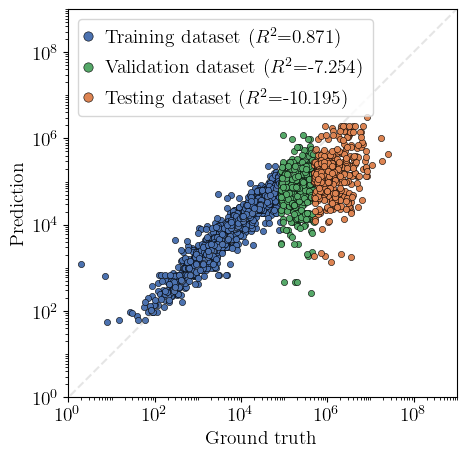

ThisWork 1/1
Training Loss: 0.1778, R2: 0.6868
Validation Loss: 0.9479, R2: -16.3881
Testing Loss: 2.9730, R2: -25.4390


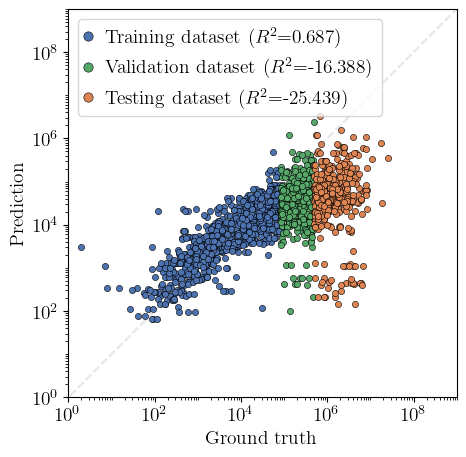

ThisWork 1/1
Training Loss: 0.3702, R2: 0.3479
Validation Loss: 1.8497, R2: -32.9299
Testing Loss: 5.1157, R2: -44.4953


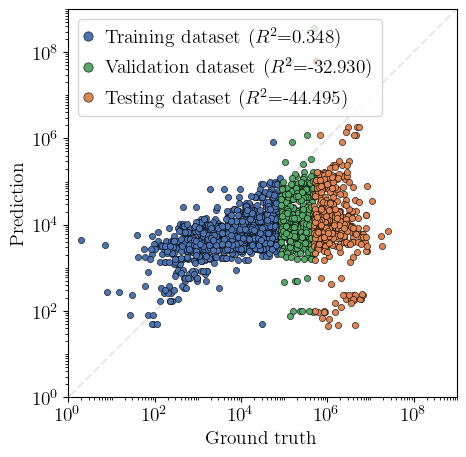

ThisWork 1/1
Training Loss: 0.2205, R2: 0.6117
Validation Loss: 1.0170, R2: -17.6554
Testing Loss: 2.5654, R2: -21.8148


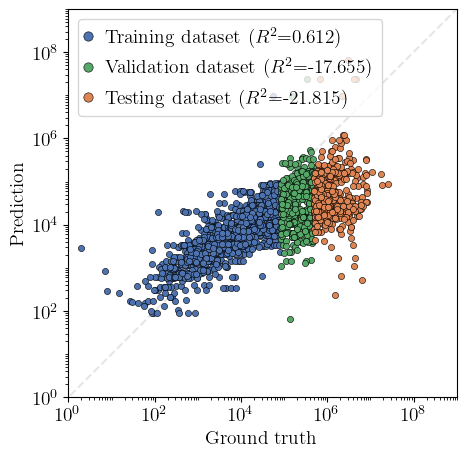

LightGBMXT_BAG_L1 1/22
WeightedEnsemble_L2 2/22
NeuralNetTorch_BAG_L1 3/22
NeuralNetFastAI_BAG_L1 4/22
CatBoost_BAG_L1 5/22
NeuralNetFastAI_BAG_L2 6/22
WeightedEnsemble_L3 7/22
LightGBM_BAG_L1 8/22
NeuralNetTorch_BAG_L2 9/22
XGBoost_BAG_L1 10/22
ExtraTreesMSE_BAG_L2 11/22
RandomForestMSE_BAG_L2 12/22
LightGBMLarge_BAG_L1 13/22
LightGBMLarge_BAG_L2 14/22
LightGBMXT_BAG_L2 15/22
LightGBM_BAG_L2 16/22
CatBoost_BAG_L2 17/22
XGBoost_BAG_L2 18/22
RandomForestMSE_BAG_L1 19/22
ExtraTreesMSE_BAG_L1 20/22
KNeighborsDist_BAG_L1 21/22
KNeighborsUnif_BAG_L1 22/22
LightGBMXT_BAG_L1 1/22
Training Loss: 0.0302, R2: 0.9469
Validation Loss: 0.5438, R2: -8.9760
Testing Loss: 2.0376, R2: -17.1211
WeightedEnsemble_L2 2/22
Training Loss: 0.0302, R2: 0.9469
Validation Loss: 0.5438, R2: -8.9760
Testing Loss: 2.0376, R2: -17.1211
NeuralNetTorch_BAG_L1 3/22
Training Loss: 0.0769, R2: 0.8646
Validation Loss: 0.6605, R2: -11.1166
Testing Loss: 2.1522, R2: -18.1402
NeuralNetFastAI_BAG_L1 4/22
Training Loss: 0.0841

In [7]:
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='MLP')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWork')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorklinlog')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorkloglog')
with HiddenPltShow():
    trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='AutoGluon')

# Material Cycle split

In [8]:
from src.core.datasplitter import MaterialCycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = MaterialCycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    AutoGluon(trainer),
    MLP(trainer),
    ThisWork(trainer),
    ThisWork(trainer, manual_activate=["linlogSN"], program="ThisWorklinlog"),
    ThisWork(trainer, manual_activate=["loglogSN"], program="ThisWorkloglog"),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

Using cpu device
{
	'project': 'SNL_MSU_DOE_fatigue',
	'loss': 'mse',
	'bayes_opt': False,
	'bayes_epoch': 3,
	'patience': 50,
	'epoch': 200,
	'lr': 0.003,
	'weight_decay': 0.002,
	'batch_size': 1024,
	'static_params': {
		'patience': 50,
		'epoch': 200
	},
	'chosen_params': {
		'lr': 0.003,
		'weight_decay': 0.002,
		'batch_size': 1024
	},
	'layers': [
		16,
		64,
		128,
		128,
		64,
		16
	],
	'n_calls': 100,
	'SPACEs': {
		'lr': {
			'type': 'Real',
			'low': 0.001,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'weight_decay': {
			'type': 'Real',
			'low': 1e-05,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'batch_size': {
			'type': 'Categorical',
			'categories': [
				32,
				64,
				128,
				256,
				512,
				1024,
				2048,
				4096
			]
		}
	},
	'data_splitter': 'RandomSplitter',
	'data_processors': [
		'IQRRemover',
		'MeanImputer',
		'SingleValueFeatureRemover',
		'UnscaledDataRecorder',
		'StandardScaler'
	],
	'data_derivers': {
		'MinStressDeriver': {
			'derived_

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "output/SNL_MSU_DOE_fatigue/2022-12-21-14-52-10_base_SNL_MSU_DOE_fatigue/AutoGluon/"
AutoGluon Version:  0.6.1
Python Version:     3.7.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Mon Dec 13 20:27:58 CST 2021
Train Data Rows:    1270
Train Data Columns: 19
Tuning Data Rows:    414
Tuning Data Columns: 19
Label Column: log(Cycles to Failure)
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (6.60235239020725, 0.2808059283936668, 3.86789, 0.87003)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary'

Removing outliers by IQR. Original size: 4931, Final size: 2168.
1 features removed: ['90-deg layers']. 19 features retained: ['Percentage of Fibre in 0-deg Direction', 'Percentage of Fibre in 45-deg Direction', 'Percentage of Fibre in 90-deg Direction', 'Percentage of Fibre in Other Direction', 'Frequency', 'Fibre Volumn Fraction', 'Thickness', 'Static Maximum Tensile Stress', 'Static Maximum Tensile Strain', 'Static Elastic Modulus', 'Absolute Maximum Stress', 'Absolute Peak-to-peak Stress', 'Absolute Mean Stress', 'Relative Maximum Stress', 'Relative Peak-to-peak Stress', 'Relative Mean Stress', '0-deg layers', '45-deg layers', 'Other-deg layers'].
Dataset size: 1270 414 484

-------------Run AutoGluon-------------



	-0.8984	 = Validation score   (-root_mean_squared_error)
	0.0s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ...
	-0.8066	 = Validation score   (-root_mean_squared_error)
	0.0s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-0.5512	 = Validation score   (-root_mean_squared_error)
	3.47s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-0.5896	 = Validation score   (-root_mean_squared_error)
	2.2s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-0.6631	 = Validation score   (-root_mean_squared_error)
	0.25s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with Parallel

Trainer saved. To load the trainer, run trainer = load_trainer(path='output/SNL_MSU_DOE_fatigue/2022-12-21-14-52-10_base_SNL_MSU_DOE_fatigue/trainer.pkl')

-------------AutoGluon End-------------


-------------Run MLP-------------

Epoch: 1/200, Train loss: 20.6721, Val loss: 10.6247, Min val loss: 10.6247
Epoch: 100/200, Train loss: 0.0974, Val loss: 0.4229, Min val loss: 0.3533
Epoch: 200/200, Train loss: 0.0794, Val loss: 0.3773, Min val loss: 0.2922
Early stopping at epoch 200, Checkpoint at epoch 150, Train loss: 0.0729, Val loss: 0.2922
Minimum loss: 0.29216
Test MSE loss: 0.71554, RMSE loss: 0.84590
Trainer saved. To load the trainer, run trainer = load_trainer(path='output/SNL_MSU_DOE_fatigue/2022-12-21-14-52-10_base_SNL_MSU_DOE_fatigue/trainer.pkl')

-------------MLP End-------------


-------------Run ThisWork-------------

Activated SN models: ['TrivialSN', 'linlogSN', 'loglogSN']
Epoch: 1/200, Train loss: 15.7074, Val loss: 26.6488, Min val loss: 26.6488
Epoch: 100/200, Tr

In [9]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10,  r_value=0.1, load_dir='tension', verbose=False)
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP")

In bootstrap CI:
Training 5/23
Validation 2/8
Testing 0/10
In statistical CI:
Training 9/23
Validation 4/8
Testing 1/10
In bootstrap CI:
Training 18/44
Validation 3/14
Testing 3/3
In statistical CI:
Training 17/44
Validation 3/14
Testing 1/3
In bootstrap CI:
Training 8/25
Validation 6/7
Testing 2/9
In statistical CI:
Training 13/25
Validation 3/7
Testing 1/9
In bootstrap CI:
Training 10/16
Validation 0/4
Testing 0/7
In statistical CI:
Training 8/16
Validation 0/4
Testing 0/7
In bootstrap CI:
Training 18/21
Validation 3/7
Testing 0/7
In statistical CI:
Training 11/21
Validation 1/7
Testing 0/7
In bootstrap CI:
Training 14/16
Validation 3/5
Testing 7/12
In statistical CI:
Training 13/16
Validation 3/5
Testing 3/12
In bootstrap CI:
Training 10/21
Validation 3/6
Testing 0/6
In statistical CI:
Training 12/21
Validation 3/6
Testing 1/6
In bootstrap CI:
Training 6/12
Validation 3/3
Testing 3/4
In statistical CI:
Training 8/12
Validation 3/3
Testing 3/4
In bootstrap CI:
Training 9/23
Validatio

MLP 1/1
Training Loss: 0.1047, R2: 0.8616
Validation Loss: 0.2922, R2: 0.0588
Testing Loss: 0.7155, R2: -1.6251


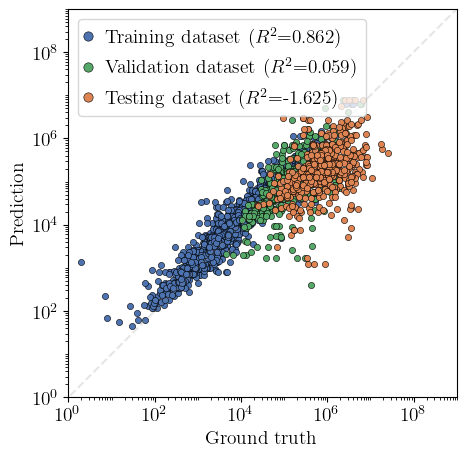

ThisWork 1/1
Training Loss: 0.2285, R2: 0.6979
Validation Loss: 0.5035, R2: -0.6222
Testing Loss: 1.4245, R2: -4.2261


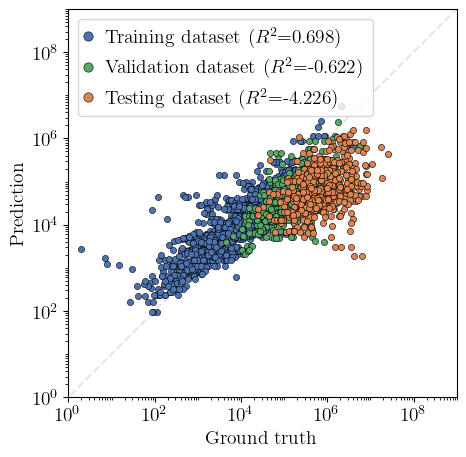

ThisWork 1/1
Training Loss: 0.3393, R2: 0.5513
Validation Loss: 1.2372, R2: -2.9859
Testing Loss: 2.9770, R2: -9.9219


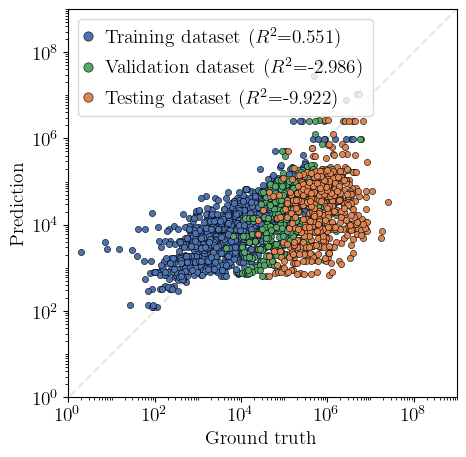

ThisWork 1/1
Training Loss: 0.2351, R2: 0.6891
Validation Loss: 0.6902, R2: -1.2235
Testing Loss: 1.7155, R2: -5.2935


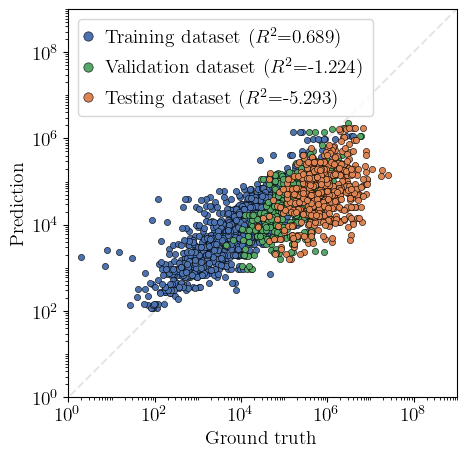

LightGBMXT_BAG_L1 1/22
WeightedEnsemble_L2 2/22
NeuralNetFastAI_BAG_L1 3/22
NeuralNetTorch_BAG_L1 4/22
WeightedEnsemble_L3 5/22
RandomForestMSE_BAG_L2 6/22
NeuralNetFastAI_BAG_L2 7/22
CatBoost_BAG_L1 8/22
ExtraTreesMSE_BAG_L2 9/22
LightGBM_BAG_L2 10/22
LightGBMLarge_BAG_L2 11/22
LightGBM_BAG_L1 12/22
XGBoost_BAG_L2 13/22
NeuralNetTorch_BAG_L2 14/22
LightGBMXT_BAG_L2 15/22
CatBoost_BAG_L2 16/22
XGBoost_BAG_L1 17/22
LightGBMLarge_BAG_L1 18/22
RandomForestMSE_BAG_L1 19/22
ExtraTreesMSE_BAG_L1 20/22
KNeighborsDist_BAG_L1 21/22
KNeighborsUnif_BAG_L1 22/22
LightGBMXT_BAG_L1 1/22
Training Loss: 0.0323, R2: 0.9573
Validation Loss: 0.3038, R2: 0.0212
Testing Loss: 1.1303, R2: -3.1468
WeightedEnsemble_L2 2/22
Training Loss: 0.0323, R2: 0.9573
Validation Loss: 0.3038, R2: 0.0212
Testing Loss: 1.1303, R2: -3.1468
NeuralNetFastAI_BAG_L1 3/22
Training Loss: 0.1078, R2: 0.8574
Validation Loss: 0.3967, R2: -0.2779
Testing Loss: 1.1760, R2: -3.3144
NeuralNetTorch_BAG_L1 4/22
Training Loss: 0.0746, R2: 

In [10]:
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='MLP')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWork')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorklinlog')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorkloglog')
with HiddenPltShow():
    trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='AutoGluon')

In [2]:
from src.core.datasplitter import MaterialCycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = MaterialCycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    ThisWork(trainer, manual_activate=["linlogSN"]),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

Using cpu device
{
	'project': 'SNL_MSU_DOE_fatigue',
	'loss': 'mse',
	'bayes_opt': False,
	'bayes_epoch': 3,
	'patience': 50,
	'epoch': 200,
	'lr': 0.003,
	'weight_decay': 0.002,
	'batch_size': 1024,
	'static_params': {
		'patience': 50,
		'epoch': 200
	},
	'chosen_params': {
		'lr': 0.003,
		'weight_decay': 0.002,
		'batch_size': 1024
	},
	'layers': [
		16,
		64,
		128,
		128,
		64,
		16
	],
	'n_calls': 100,
	'SPACEs': {
		'lr': {
			'type': 'Real',
			'low': 0.001,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'weight_decay': {
			'type': 'Real',
			'low': 1e-05,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'batch_size': {
			'type': 'Categorical',
			'categories': [
				32,
				64,
				128,
				256,
				512,
				1024,
				2048,
				4096
			]
		}
	},
	'data_splitter': 'RandomSplitter',
	'data_processors': [
		'IQRRemover',
		'MeanImputer',
		'SingleValueFeatureRemover',
		'UnscaledDataRecorder',
		'StandardScaler'
	],
	'data_derivers': {
		'MinStressDeriver': {
			'derived_

In [3]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10,  r_value=0.1, load_dir='tension', verbose=False, refit=False)

In statistical CI:
Training 7/23
Validation 0/8
Testing 0/10
In statistical CI:
Training 12/44
Validation 0/14
Testing 0/3
In statistical CI:
Training 11/25
Validation 5/7
Testing 0/9
In bootstrap CI:
Training 1/16
Validation 0/4
Testing 0/7
In statistical CI:
Training 11/16
Validation 0/4
Testing 0/7
In bootstrap CI:
Training 6/21
Validation 0/7
Testing 0/7
In statistical CI:
Training 9/21
Validation 0/7
Testing 0/7
In bootstrap CI:
Training 4/16
Validation 0/5
Testing 0/12
In statistical CI:
Training 7/16
Validation 0/5
Testing 1/12
In statistical CI:
Training 8/21
Validation 0/6
Testing 0/6
In statistical CI:
Training 8/12
Validation 0/3
Testing 0/4


In [7]:
trainer.unscaled_feature_data.loc[trainer._select_by_material_code(m_code='DB-BIAX-DH3-EP1(+/-45)3S', partition='train'), :]

,Percentage of Fibre in 0-deg Direction,Percentage of Fibre in 45-deg Direction,Percentage of Fibre in 90-deg Direction,Percentage of Fibre in Other Direction,Frequency,Fibre Volumn Fraction,Thickness,Static Maximum Tensile Stress,Static Maximum Tensile Strain,Static Elastic Modulus,Absolute Maximum Stress,Absolute Peak-to-peak Stress,Absolute Mean Stress,Relative Maximum Stress,Relative Peak-to-peak Stress,Relative Mean Stress,0-deg layers,45-deg layers,Other-deg layers
107,0.0,99.199997,0.0,0.8,1.5,54.099998,3.72,620.758301,2.772289,24.954012,75.800003,68.220001,41.689999,0.495442,0.445943,0.27247,0.0,12.0,0.0
94,0.0,96.699997,2.5,0.8,1.0,52.799999,3.66,620.758301,2.772289,24.954012,86.199997,77.580002,47.410000,0.495442,0.445943,0.27247,0.0,12.0,0.0
95,0.0,96.699997,2.5,0.8,1.0,53.200001,3.63,620.758301,2.772289,24.954012,86.199997,77.580002,47.410000,0.495442,0.445943,0.27247,0.0,12.0,0.0
90,0.0,96.699997,2.5,0.8,2.0,56.799999,3.40,620.758301,2.772289,24.954012,55.200001,49.680000,30.360001,0.495442,0.445943,0.27247,0.0,12.0,0.0
84,0.0,96.699997,2.5,0.8,2.0,56.000000,3.45,620.758301,2.772289,24.954012,86.199997,77.580002,47.410000,0.495442,0.445943,0.27247,0.0,12.0,0.0
93,0.0,96.699997,2.5,0.8,1.0,53.500000,3.61,620.758301,2.772289,24.954012,86.199997,77.580002,47.410000,0.495442,0.445943,0.27247,0.0,12.0,0.0
99,0.0,96.699997,2.5,0.8,1.5,53.500000,3.61,620.758301,2.772289,24.954012,69.000000,62.099998,37.950001,0.495442,0.445943,0.27247,0.0,12.0,0.0
105,0.0,96.699997,2.5,0.8,1.0,54.099998,3.57,620.758301,2.772289,24.954012,69.000000,62.099998,37.950001,0.495442,0.445943,0.27247,0.0,12.0,0.0
83,0.0,96.699997,2.5,0.8,2.0,51.099998,3.78,620.758301,2.772289,24.954012,86.199997,77.580002,47.410000,0.495442,0.445943,0.27247,0.0,12.0,0.0
106,0.0,99.199997,0.0,0.8,1.5,54.099998,3.72,620.758301,2.772289,24.954012,75.800003,68.220001,41.689999,0.495442,0.445943,0.27247,0.0,12.0,0.0


### Permutation feature importance

In [11]:
# trainer.plot_feature_importance(modelbase=trainer.get_modelbase('ThisWork'), fig_size=(8,6))

### Partial dependence

In [12]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [13]:
# trainer.get_leaderboard(test_data_only=False)